# Homework Set 2

**Author**: Chase Coleman

**NYU ID**: N10827183

**Date**: 12 February 2016

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

%matplotlib inline

## Question

Consider a market with demand curve

\begin{align*}
  y = a p^{\varepsilon}
\end{align*}

and supply curve

\begin{align*}
  y = \exp(bp) - 1
\end{align*}

The Matlab files `demand.m`, `supply.m`, and `main.m`, which are borrowed from Tony Smith's comp econ course, solve for equilibrium prices and quantities. In particular, they use a bisection algorithm to search for the pair $(p, y)$ such that both equalities are satisfied. The parameters are set to $a=1.0$, $b=0.1$, and $\varepsilon=1.0$.

* [Bisection Method](https://en.wikipedia.org/wiki/Bisection_method)

### Exercise 1

In a Jupyter notebook, write a python function that takes $(a, b, \varepsilon)$ as its arguments and returns the equilibrium price. The simplest way is to turn the Matlab code prvoided into valid Python code.

Use the function you have just written to compute the equilibrium price at the following values of $(a, b, \varepsilon)$: (1.0, 0.1, 1.0), (2.0, 0.1, 1.0), (1.0, 0.1, 2.0). Your output should be displayed in the same Jupyter notebook.

Submit your notebook file (the ipynb file) via pull request to

<div style="text-align: center">
<a href="https://github.com/jstac/quantecon_nyu_2016_homework">https://github.com/jstac/quantecon_nyu_2016_homework</a>
</div>

Add your solution as a file to the directory `hw_set_2`. The name of your file should be `firstname_lastname.ipynb`.

Add the following information at the top of the notebook: Name and student or university ID. A simple and brief description of the problem.

## Solution

### Exercise 1

Consider the economy described above. Namely, supply is determined by

\begin{align*}
  y^{S} = \exp(bp) - 1
\end{align*}

and demand is given by

\begin{align*}
  y^{D} = a p^{\varepsilon}
\end{align*}

Our task is to determine the equilibrium price and quantity. We will do this by setting it up as a bisection problem -- In equilibrium we will get that supply is equal to demand, that is $y^{S} = y^{D}$. Thus if we can find where $y^{S} - y^{D} = 0$ then our equilibrium will be pinned down.

We can use the _Bisection Method_ to find the pair $(p, y)$ that achieves this equilibrium.


The first thing we will do is write down functions that given parameters and a price will output the quantity supplied and demanded.

In [16]:
def supplycurve(p, a, b, eps):
    """
    Produces the quantity supplied
    """
    ys = np.exp(b*p) - 1
    
    return ys


def demandcurve(p, a, b, eps):
    """
    Produces the quantity demanded
    """
    yd = a/(p**eps)
    
    return yd
    

We can then write a function that bisects over prices to find the equilibrium price and then can return the equilibrium pair $(p^*, y^*)$.

In [22]:
def supplydemandbisect(lb, ub, a, b, eps):
    # Function that takes difference of supply and demand curves
    sup_m_dem = lambda p: supplycurve(p, a, b, eps) - demandcurve(p, a, b, eps)
    
    equilibrium_p = opt.bisect(sup_m_dem, lb, ub)
    equilibrium_y = supplycurve(equilibrium_p, a, b, eps)
    
    return (equilibrium_p, equilibrium_y)

We will show these equilibrium by plotting them on a graph with the supply and demand curves.

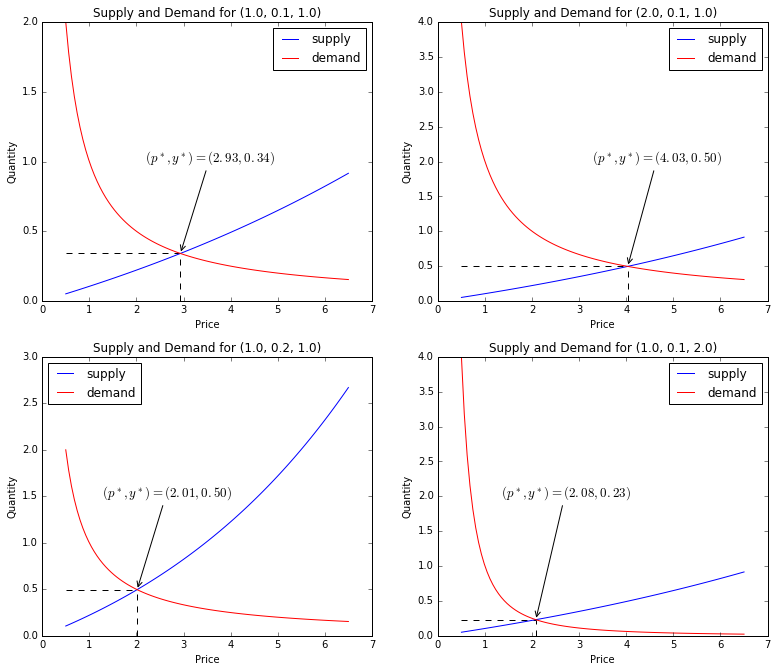

In [42]:
params = [(1.0, 0.1, 1.0), (2.0, 0.1, 1.0),
          (1.0, 0.2, 1.0), (1.0, 0.1, 2.0)]

# Declare figure and flatten axis array
fig, ax = plt.subplots(2, 2, figsize=(13, 11))
ax = ax.flatten()

# For each parameterization we will plot this along
# prices from 0.5 to 6.5 with N points
lb, ub = 0.5, 6.5
N = 100
p = np.linspace(lb, ub, N)

# For each parameterization get the quantities
for i in range(len(params)):
    # Current parameter values
    ac, bc, epsc = params[i]
    titletext = "Supply and Demand for ({}, {}, {})".format(ac, bc, epsc)
    
    # Get supply and demand curves
    ys = supplycurve(p, ac, bc, epsc)
    yd = demandcurve(p, ac, bc, epsc)
    pstar, ystar = supplydemandbisect(0.01, 10.0, ac, bc, epsc)
    
    # Plot the curves
    ax[i].plot(p, ys, label="supply", color="b")
    ax[i].plot(p, yd, label="demand", color="r")
    
    # Plot the equilibrium
    ymean = np.mean(ax[i].get_ybound())
    ann = r"$(p^*, y^*) = ({:04.2f}, {:04.2f})$".format(pstar, ystar)
    ax[i].annotate(s=ann, xy=(pstar, ystar), xytext=(pstar-0.75, ymean), size=13,
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    ax[i].hlines(ystar, lb, pstar, linestyles="dashed")
    ax[i].vlines(pstar, 0.0, ystar, linestyles="dashed")
    
    # Add information about plot
    ax[i].set_xlabel("Price")
    ax[i].set_ylabel("Quantity")
    ax[i].set_title(titletext)
    ax[i].legend(loc=0)
